In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the datasets

conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
# first 5 rows for confirmed cases dataset
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/22,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176039,176201,176409,176571,176743,176918,176983,177039,177093,177191
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272621,272663,272689,272711,272804,272885,272961,273040,273088,273088
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265410,265432,265457,265478,265496,265511,265524,265539,265550,265562
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38794,38794,38794,38794,38794,39234,39234,39234,39234,39234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98909,98927,98931,98956,98985,99003,99003,99003,99003,99010


In [4]:
# first 5 rows for confirmed cases dataset
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/22,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7641,7643,7645,7646,7651,7651,7651,7652,7654,7654
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3485,3485,3485,3486,3487,3487,3487,3487,3487,3487
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6862,6864,6866,6868,6869,6870,6871,6871,6871,6872
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,152,152,152,152,152,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [5]:
# getting all the dates for confirmed cases and deaths
# selecting only the dates columns

cols = conf_df.keys()
conf = conf_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [6]:
# getting total confirmed cases, total deaths, world cases and mortality rate
dates = conf.keys()

cases_in_world = []
deaths_total = []
rate_of_mortality = []

def total_calc(a, b):
    for i in dates:
        a_sum = a[i].sum()
        b_sum = b[i].sum()
        
        cases_in_world.append(a_sum)
        deaths_total.append(b_sum)
        rate_of_mortality.append(b_sum/a_sum)
    return a_sum, b_sum

conf_sum, death_sum = total_calc(conf, deaths)
print('Total confirmed cases: ', conf_sum)
print('Total deaths : ', death_sum)

Total confirmed cases:  472117794
Total deaths :  6093852


In [8]:
# function for calculating daily increase and moving average
# moving average - as the average is not linear, we need to calculate the moving average for plotting

def daily_increase(a):
    d = []
    for i in range(len(a)):
        if i == 0:
            d.append(a[0])
        else:
            d.append(a[i]-a[i-1])
    return d

def moving_average(a, w):
    d = []
    for i in range(len(a)):
        if i+w < len(a):
            d.append(np.mean(a[i:i+w]))
        else:
            d.append(np.mean(a[i:len(a)]))
    return d

In [9]:
# calculating daily increase and moving average

# setting window size
w = 7

# for confirmed cases
increase_per_day_world = daily_increase(cases_in_world)
conf_cases_world_avg = moving_average(cases_in_world, w)
increase_per_day_world_avg = moving_average(increase_per_day_world, w)

# for death cases
death_per_day_world = daily_increase(deaths_total)
death_cases_world_avg =  moving_average(deaths_total, w)
death_per_day_world_avg = moving_average(death_per_day_world, w)

In [10]:
# calculating and reshaping days since first reported cases for plotting

days_since_first_report = np.array([i for i in range(len(dates))])
cases_in_world = np.array(cases_in_world).reshape(-1,1)
deaths_total = np.array(deaths_total).reshape(-1,1)

In [11]:
# function for flattening the data for bar graph

def flatten(a):
    d = []
    a = a.tolist()
    for i in a:
        d.append(i[0])
    return d

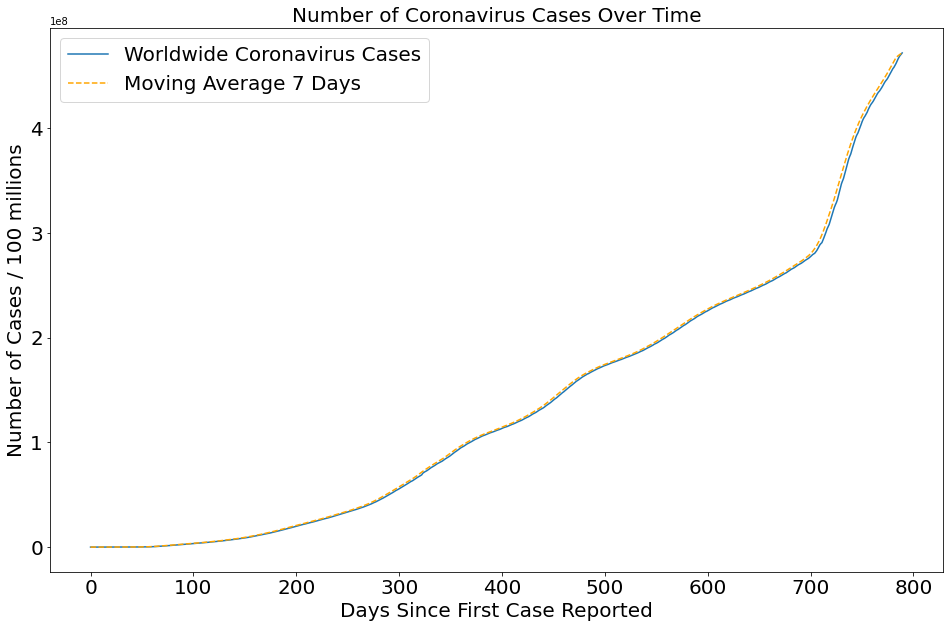

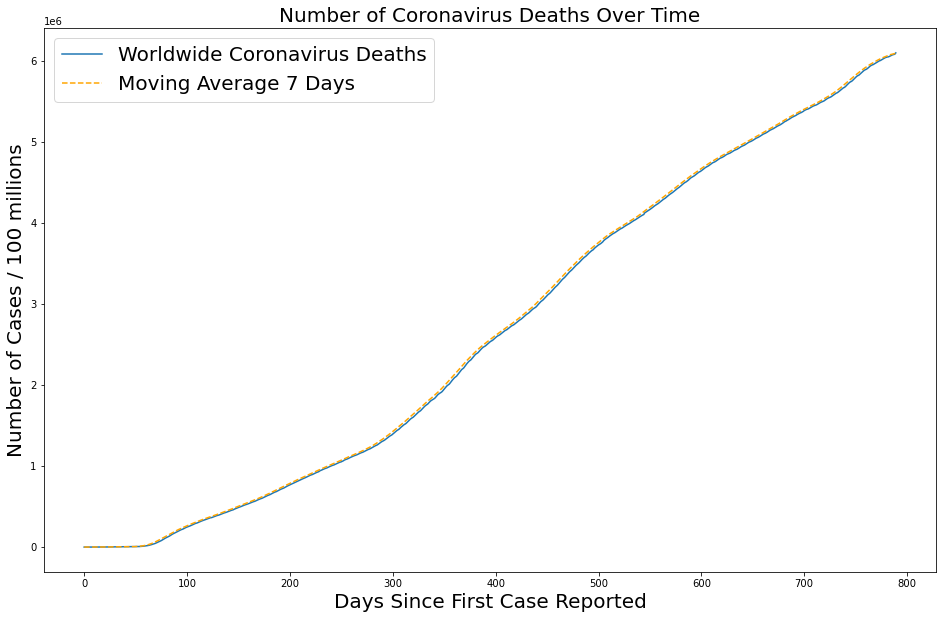

In [12]:
# plotting Number of confirmed cases and deaths over time
plt.figure(figsize=(16, 10))
plt.plot(days_since_first_report, cases_in_world)
plt.plot(days_since_first_report, conf_cases_world_avg, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since First Case Reported', size=20)
plt.ylabel('Number of Cases / 100 millions', size=20)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(w)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(days_since_first_report, deaths_total)
plt.plot(days_since_first_report, death_cases_world_avg, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since First Case Reported', size=20)
plt.ylabel('Number of Cases / 100 millions', size=20)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(w)], prop={'size': 20})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

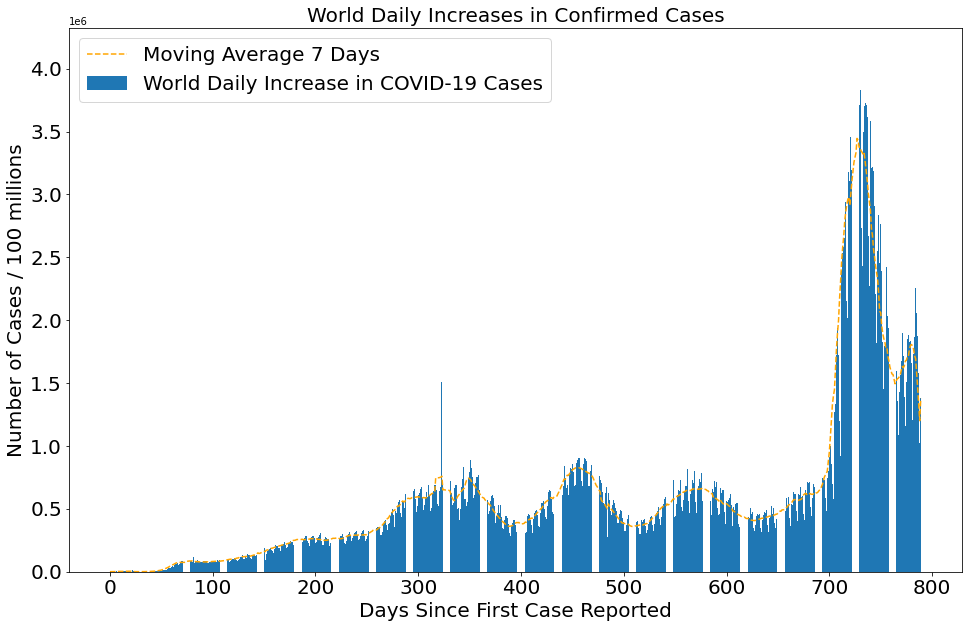

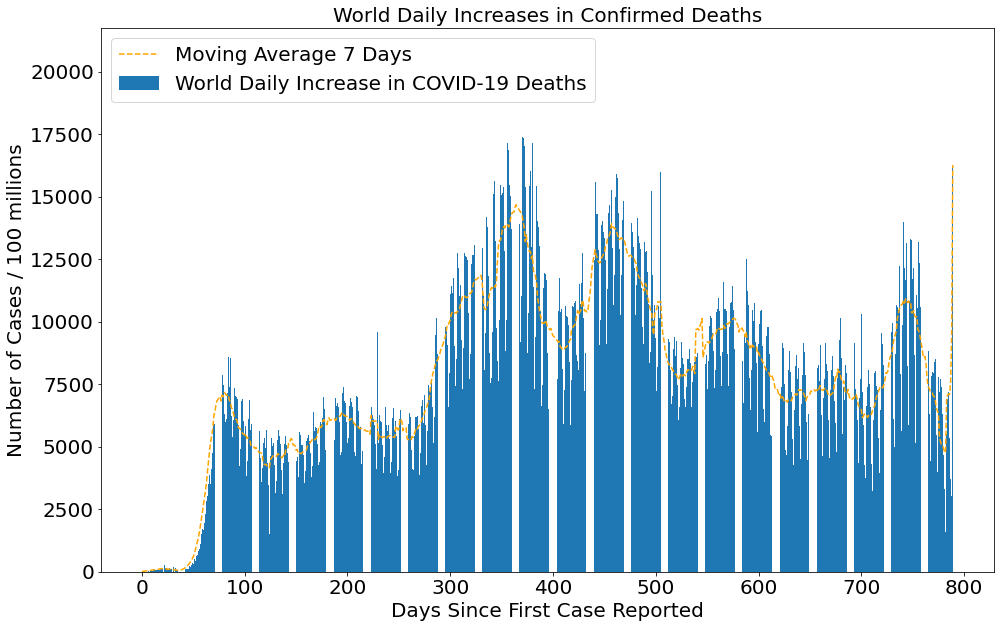

In [13]:
# plotting daily increase of confirmed cases and deaths over time
plt.figure(figsize=(16, 10))
plt.bar(days_since_first_report, increase_per_day_world)
plt.plot(days_since_first_report, increase_per_day_world_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=20)
plt.xlabel('Days Since First Case Reported', size=20)
plt.ylabel('Number of Cases / 100 millions', size=20)
plt.legend(['Moving Average {} Days'.format(w), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(days_since_first_report, death_per_day_world)
plt.plot(days_since_first_report, death_per_day_world_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=20)
plt.xlabel('Days Since First Case Reported', size=20)
plt.ylabel('Number of Cases / 100 millions', size=20)
plt.legend(['Moving Average {} Days'.format(w), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [14]:
# function for plotting countries confirmed cases and deaths over time
def plot_countries(a, b1, b2, b3, c):
    confirmed_avg = moving_average(b1, w)
    confirmed_increase_avg = moving_average(b2, w)
    death_increase_avg = moving_average(b3, w)
    
    plt.figure(figsize=(16, 10))
    plt.plot(a, b1)
    plt.plot(a, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(c), 'Moving Average {} Days'.format(w)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(c), size=20)
    plt.xlabel('Days Since First Case Reported', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.scatter(a, b2, linewidth=1, s=1)
    plt.plot(a, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(w), '{} Daily Increase in Confirmed Cases'.format(c)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(c), size=20)
    plt.xlabel('Days Since First Case Reported', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.scatter(a, b3, linewidth=1, s=1)
    plt.plot(a, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(w), '{} Daily Increase in Confirmed Deaths'.format(c)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(c), size=20)
    plt.xlabel('Days Since First Case Reported', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# function for getting the cases, deaths of a specific country        
def fetch_info_country(c):
    cases_in_a_country = []
    deaths_in_a_country = []
    
    for i in dates:
        cases_in_a_country.append(conf_df[conf_df['Country/Region']==c][i].sum())
        deaths_in_a_country.append(deaths_df[deaths_df['Country/Region']==c][i].sum())
    return (cases_in_a_country, deaths_in_a_country)
    
    
def vis_country(c):
    country_info = fetch_info_country(c)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    plot_countries(days_since_first_report, country_cases, country_daily_increase, country_daily_death, c)  

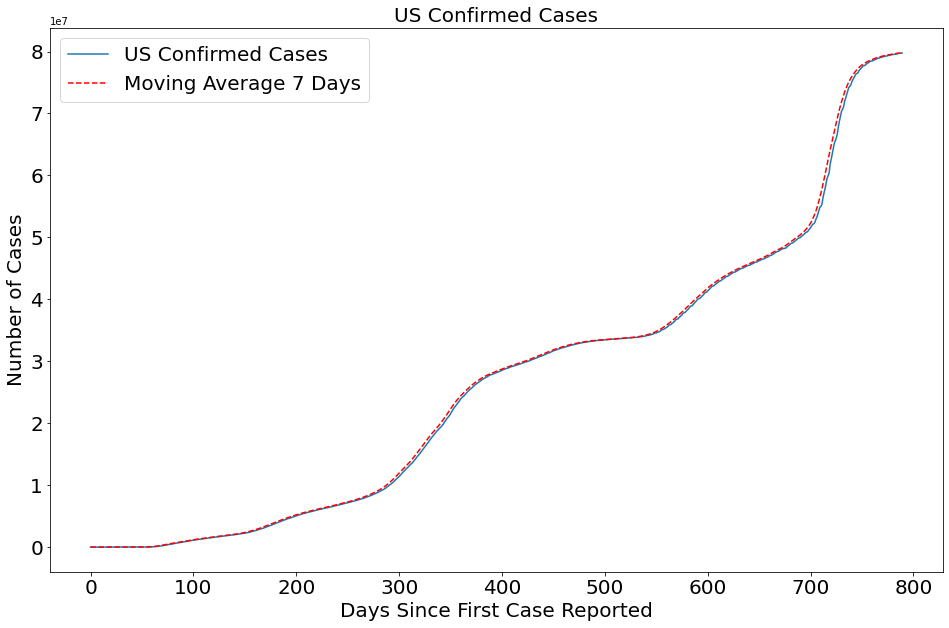

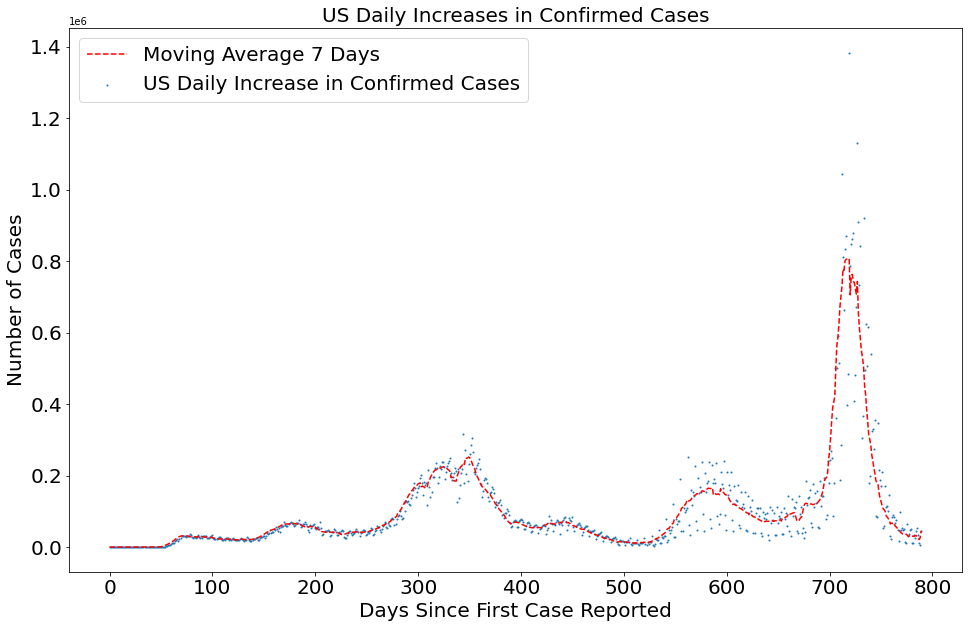

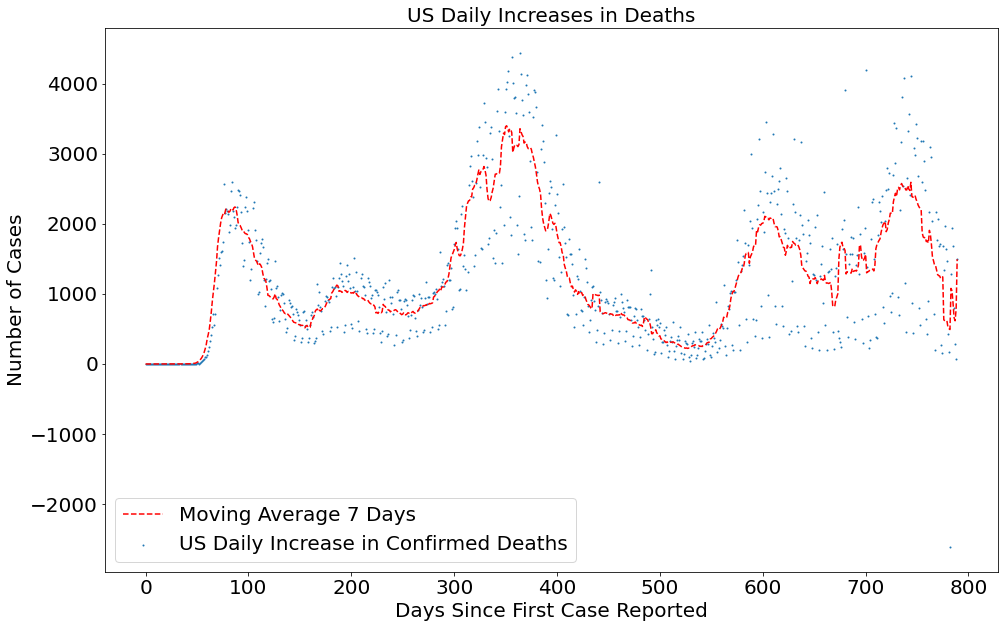

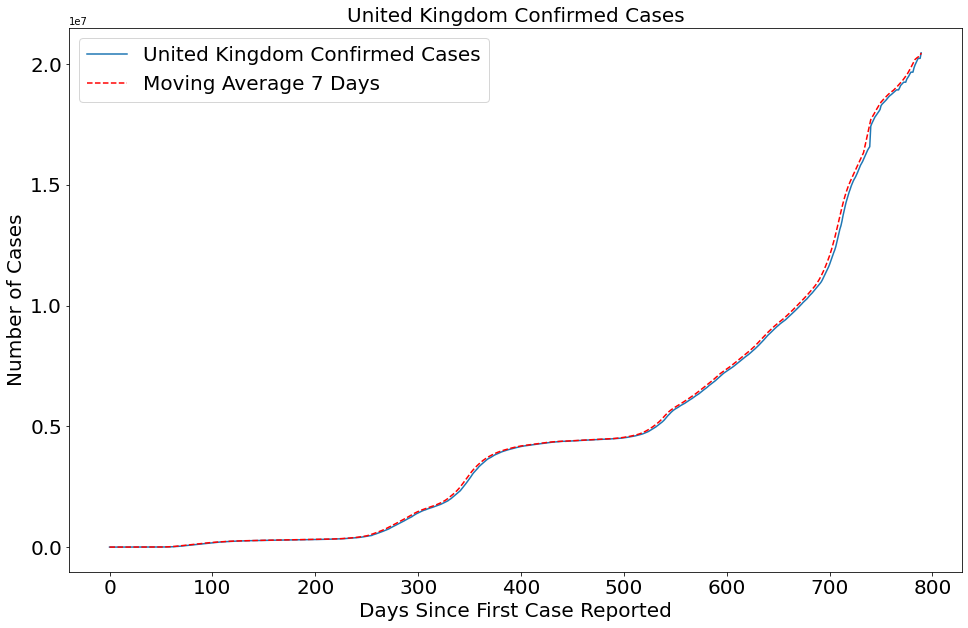

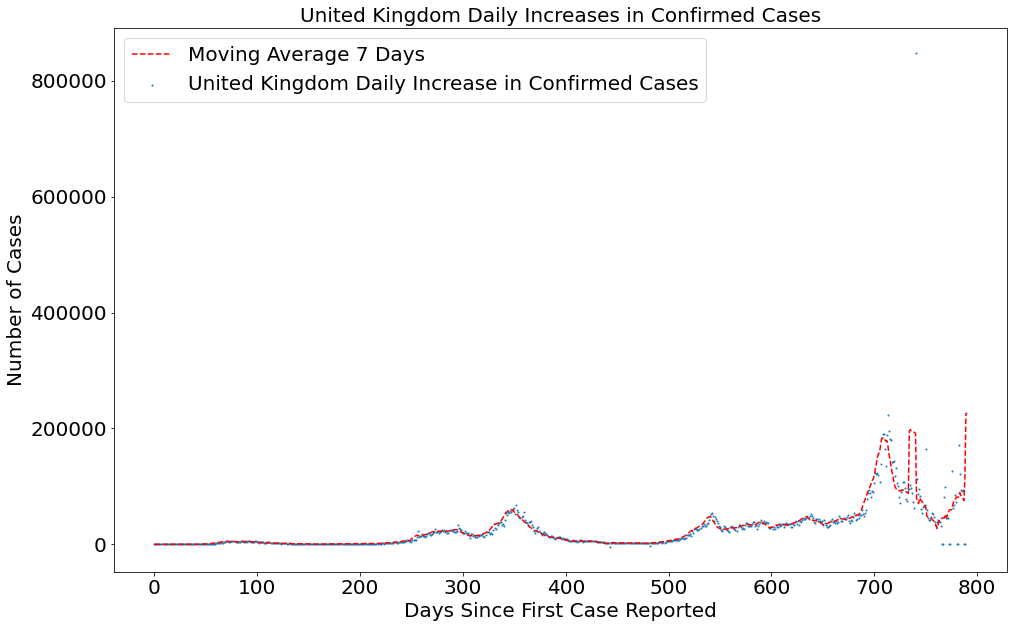

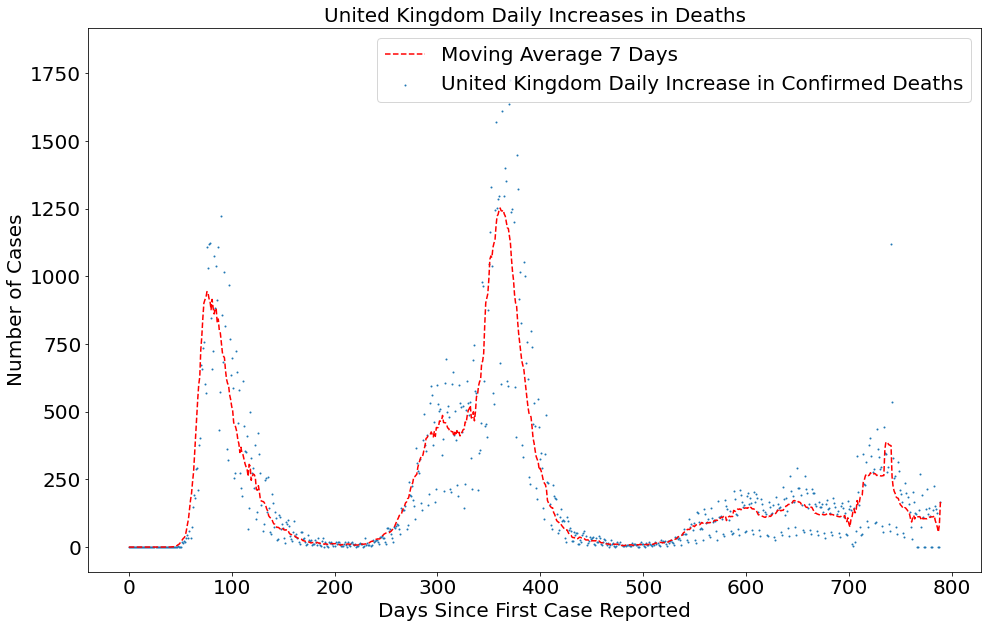

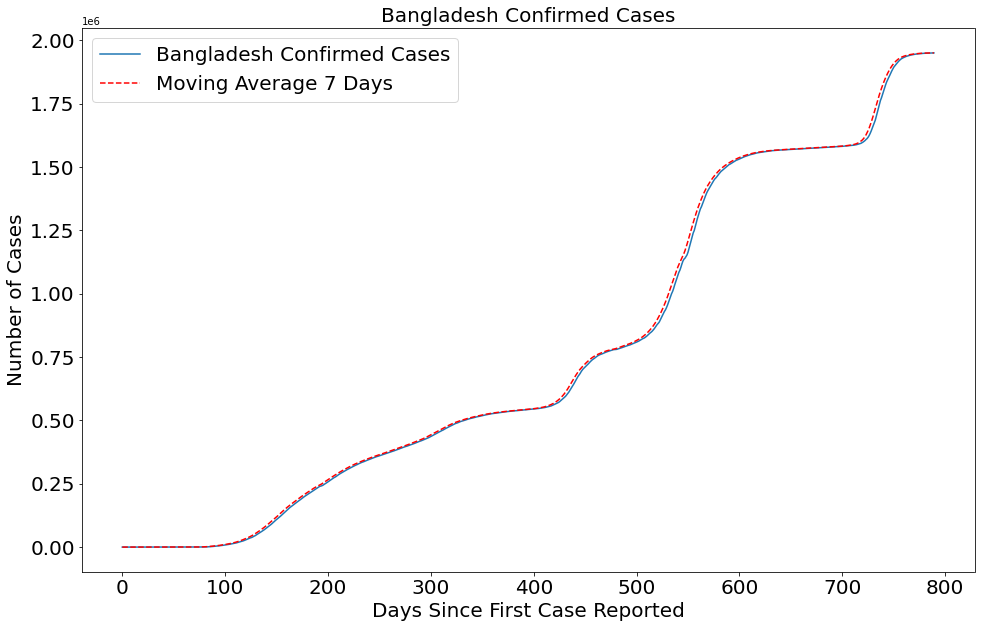

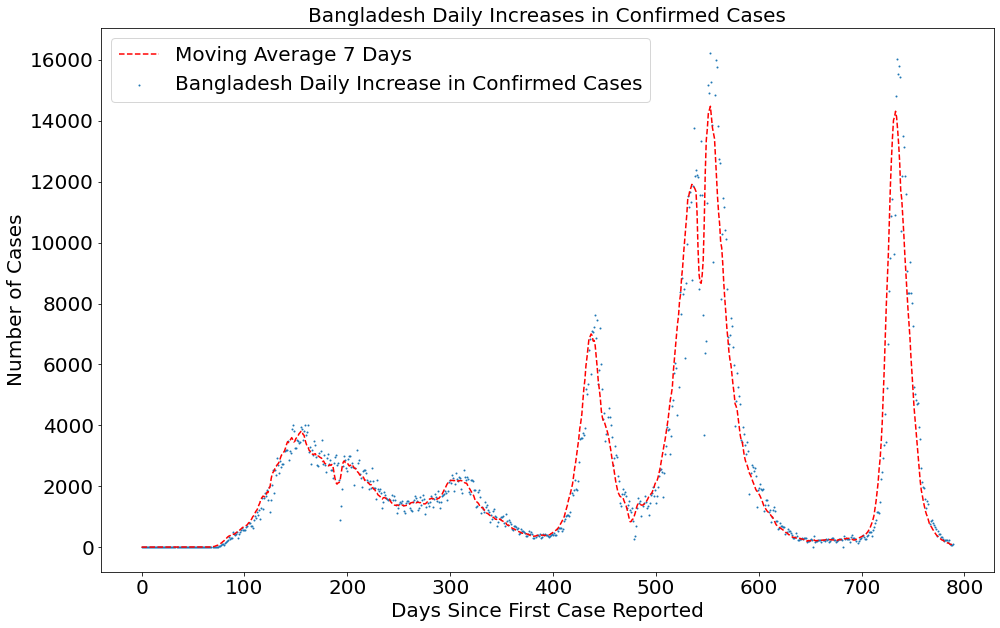

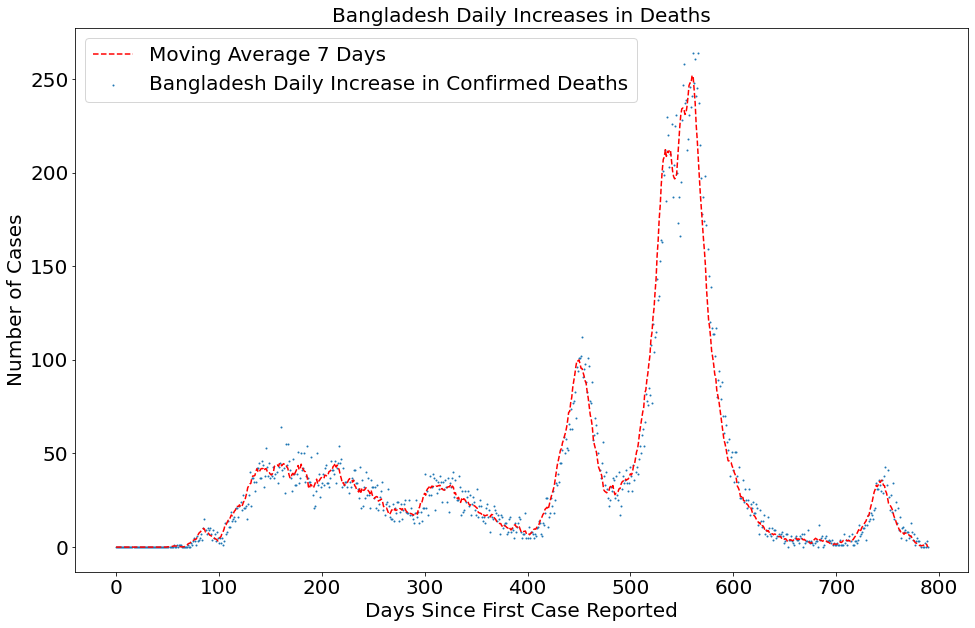

In [15]:
countries = ['US', 'United Kingdom', 'Bangladesh']

for country in countries:
    vis_country(country)

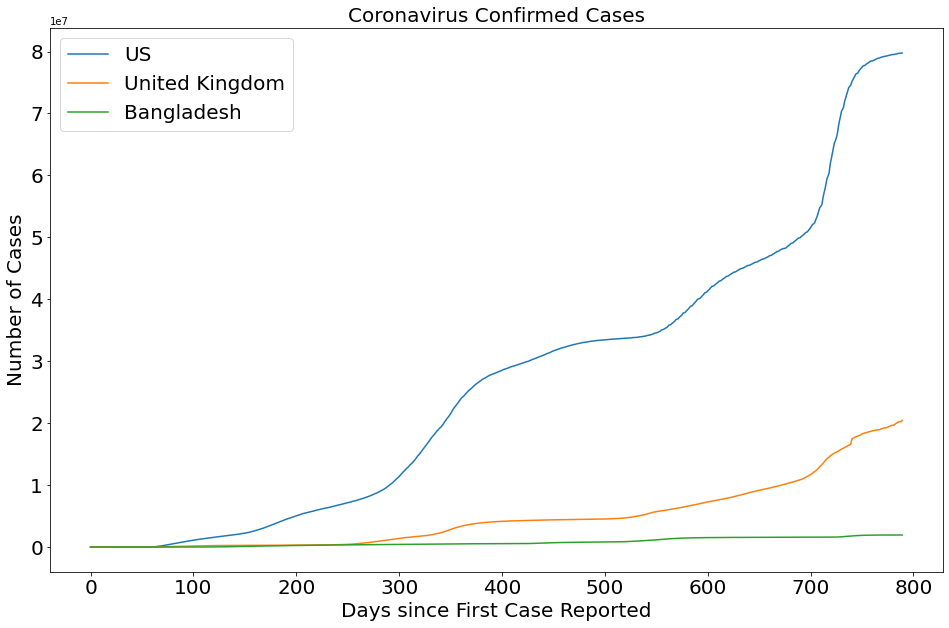

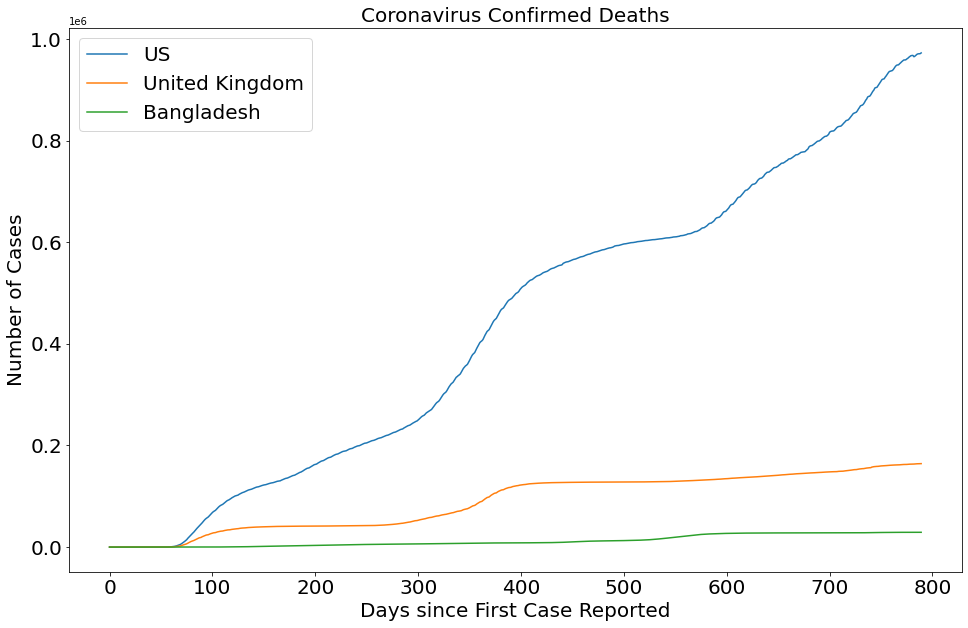

In [16]:
# plot function for caomparison between 3 countries

graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for i in range(2):
    plt.figure(figsize=(16, 10))
    for country in countries:
        plt.plot(fetch_info_country(country)[i])
    plt.legend(countries, prop={'size': 20})
    plt.xlabel('Days since First Case Reported', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.title(graph_name[i], size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

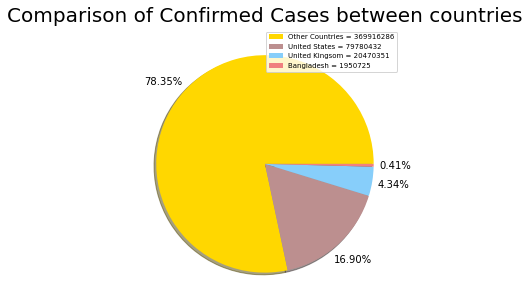

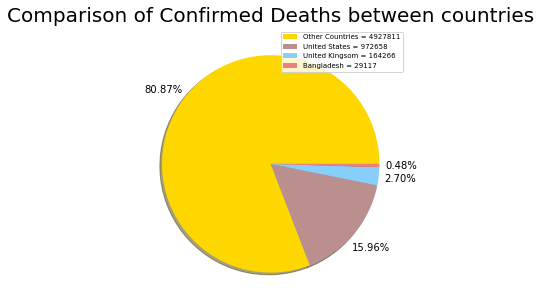

In [17]:
# pie chart for comparison between the countires
c = ['gold', 'rosybrown', 'lightskyblue', 'lightcoral']

us_country_info = fetch_info_country('US')
us_country_cases = us_country_info[0]
us_total_cases = us_country_cases[-1]
us_country_deaths = us_country_info[1]
us_deaths_total = us_country_deaths[-1]

uk_country_info = fetch_info_country('United Kingdom')
uk_country_cases = uk_country_info[0]
uk_total_cases = uk_country_cases[-1]
uk_country_deaths = uk_country_info[1]
uk_deaths_total = uk_country_deaths[-1]


bd_country_info = fetch_info_country('Bangladesh')
bd_country_cases = bd_country_info[0]
bd_total_cases = bd_country_cases[-1]
bd_country_deaths = bd_country_info[1]
bd_deaths_total = bd_country_deaths[-1]

total_cases_three_countries = us_total_cases+uk_total_cases+bd_total_cases
total_cases_other_countries = conf_sum - total_cases_three_countries

deaths_total_three_countries = us_deaths_total+uk_deaths_total+bd_deaths_total
deaths_total_other_countries = death_sum - deaths_total_three_countries

# pie chart for confirmed cases of 3 countries
plt.figure(figsize=(5, 5))
plt.pie((total_cases_other_countries, us_total_cases, uk_total_cases, bd_total_cases), colors=c, shadow=True, autopct='%.2f%%', pctdistance=1.2, labeldistance=1.2)
plt.title('Comparison of Confirmed Cases between countries', size=20)
plt.legend(('Other Countries = {}'.format(total_cases_other_countries),'United States = {}'.format(us_total_cases), 'United Kingsom = {}'.format(uk_total_cases), 'Bangladesh = {}'.format(bd_total_cases)), prop={'size': 7}, loc='best')
plt.show()

# pie chart for death cases of 3 countries

plt.figure(figsize=(5, 5))
plt.pie((deaths_total_other_countries, us_deaths_total, uk_deaths_total, bd_deaths_total), colors=c, shadow=True, autopct='%.2f%%', pctdistance=1.2, labeldistance=1.2)
plt.title('Comparison of Confirmed Deaths between countries', size=20)
plt.legend(('Other Countries = {}'.format(deaths_total_other_countries),'United States = {}'.format(us_deaths_total), 'United Kingsom = {}'.format(uk_deaths_total), 'Bangladesh = {}'.format(bd_deaths_total)), prop={'size': 7}, loc='best')
plt.show()

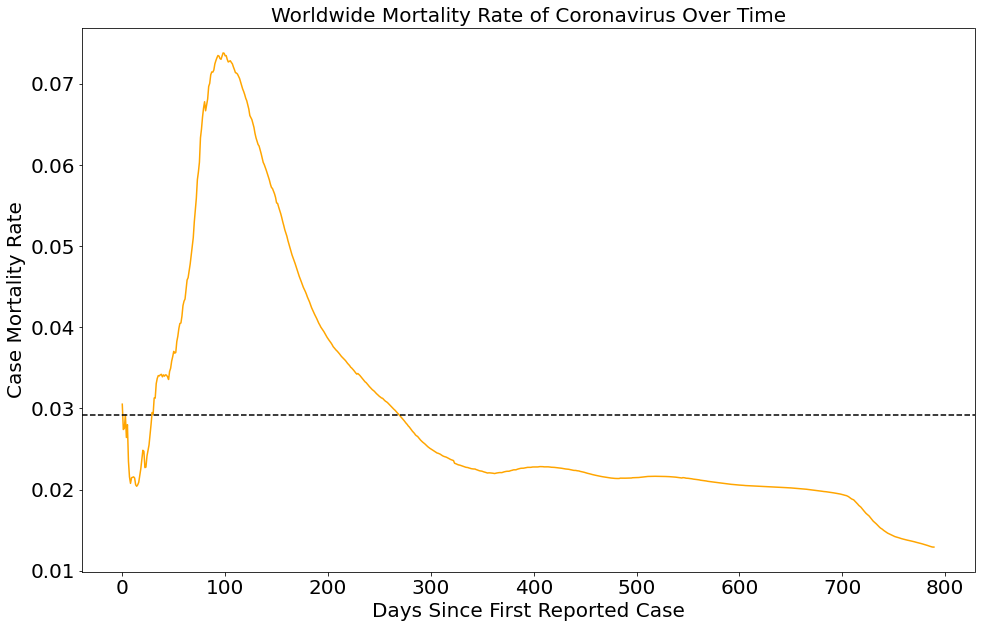

In [18]:
# worldwide mortality rate graph
mean_rate_of_mortality = np.mean(rate_of_mortality)
plt.figure(figsize=(16, 10))
plt.plot(days_since_first_report, rate_of_mortality, color='orange')
plt.axhline(y = mean_rate_of_mortality,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=20)
plt.xlabel('Days Since First Reported Case', size=20)
plt.ylabel('Case Mortality Rate', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()